In [32]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x0000020E728D65C0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\emi28\anaconda3\envs\environment\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [1]:
import numpy as np
from matplotlib.image import imread

Der Code funktioniert irgendwie nicht gut, da kommen immer mega kleine Werte raus und ich weiß nicht warum...

In [47]:
def dice_score(pred, gt):
    """
    This function calculates the similarity between two arrays.
    :param pred: an array of predicted labels
    :param gt: the ground truth of this array
    :return: a value between 0 and 1, describing the similarity between those arrays. 1 is the dice score of
    similar arrays.
    """
    dice = np.sum(pred[gt == pred]) * 2.0 / (np.sum(gt) + np.sum(pred))
    print("Dice similarity score is {}".format(dice))


if __name__ == '__main__':
    img1 = np.asarray(imread("../data/test_out.png"))
    img2 = np.asarray(imread('../data/Yeast_Cells_gt.jpg'))
    dice_score(img1, img2)

Dice similarity score is 0.00010388220806985745


Das funktioniert besser :)

In [50]:
import cv2
import numpy as np

#load images
y_pred = cv2.imread('../data/test_out.png')
y_true = cv2.imread('../data/Yeast_Cells_gt.jpg') 

# Dice similarity function
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

dice_score = dice(y_pred, y_true, k = 255) #255 in my case, can be 1 
print ("Dice Similarity: {}".format(dice_score))

Dice Similarity: 0.7275204668667217


An den Histogrammen sieht man, dass es in den gt images graue Pixel gibt

(array([3058911.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1261089.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

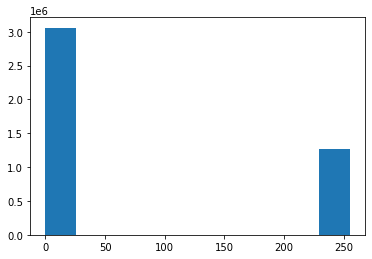

In [40]:
y_pred = cv2.imread('../data/test_out.png')
y_true = cv2.imread('../data/Yeast_Cells_gt.jpg') 

hist(y_pred.flatten())


(array([2861724.,    4236.,    3753.,    3381.,    3294.,    3225.,
           3363.,    3687.,    4590., 1428747.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

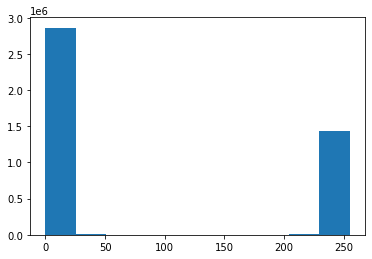

In [39]:
hist(y_true.flatten())